# De Pandas module

## Overzicht
Voor het werken met data uit tabellen is er een speciale `Python module`, namelijk `Pandas`. Deze module heeft overeenkomsten met de `Numpy` module die we gezien hebben, maar `Pandas` wordt veel gebruikt voor data analyse en statistiek en is over het algemeen eenvoudiger te begrijpen en gebruiken dan `Numpy`. In dit deel van de `Python` cursus zullen de basiselementen van `Pandas` behandeld worden.

## Het maken van Pandas Series en DataFrams

In de `Pandas` module werk je met `Series` en `DataFrames`, waarbij een `Series` een kolom in een tabel is, terwijl een `DataFrame` de hele tabel is en dus bestaan uit rijen en kolomen. Net als in een excel tabel iedere kolom een naam of label heeft, zo heeft in `Pandas` iedere `Series` een label (`name`) en een `DataFrame` kent meerdere labels.

Een `Pandas serie` maak je door eerst een `list` data type te maken [....] en vervolgens deze om te zetten met de `panda.Series()` functie. Een `Pandas DataFrame` maak je door eerst een `dictionary` data type te maken {....} en vervolgens deze om te zetten met de `panda.DataFrame()` functie:

In [3]:
import pandas as pd

city_series = pd.Series(["Tokyo", "Los Angeles", "London"], name="City") # Maak een Pandas Series van een lijst
print(city_series) # Print de inhoud van de pandas series

0          Tokyo
1    Los Angeles
2         London
Name: City, dtype: object


In [7]:
data_steden = {                        # Maak een Dictionary met de naam 'data_steden'
    "City": ["Tokyo", "Los Angeles", "London"],
    "Latitude": [35.6895, 34.0522, 51.5074],
    "Longitude": [139.6917, -118.2437, -0.1278],
}
df = pd.DataFrame(data_steden) # Zet de Dictionary om in een Pandas DataFrame met de naam 'df' met daarin de kolomen 'city', 'latitude' en 'longitude' en daarin informatie voor een drietal steden
print(f"Pandas DataFrame:\n{df}") # Print de inhoud van het pandas dataframe

Pandas DataFrame:
          City  Latitude  Longitude
0        Tokyo   35.6895   139.6917
1  Los Angeles   34.0522  -118.2437
2       London   51.5074    -0.1278


## Basis operaties op DataFrames

Je kunt allerlei operaties uitvoeren op een `Pandas DataFrame`, zoals het selecteren van een kolom of een rij, rijen filteren aan de hand van een bepaalde conditie of een nieuwe kolom toevoegen.

In [8]:
df["Latitude"] # Selecteer de kolom 'latitude'

0    35.6895
1    34.0522
2    51.5074
Name: Latitude, dtype: float64

In [9]:
df.iat[1,2] # Geef de waarde in het DataFrame van rij 1 en kolom 2

-118.2437

In [10]:
df["Latitude"][1] # Selecteer eerst de kolom 'latitude' en geef vervolgens de waarde in rij 1 (let op, we beginnen nog steeds bij nul met tellen!)

34.0522

In [11]:
df_filtered = df[df["Longitude"] < 0] # Filter de rijen in de kolom 'longitude' om te kijken welke er kleiner zijn dan 0 (dus ten westen van de meridiaan in Greenwich liggen)
df_filtered

,City,Latitude,Longitude
1,Los Angeles,34.0522,-118.2437
2,London,51.5074,-0.1278


In [12]:
import numpy as np
df["Lat_Radians"] = np.radians(df["Latitude"]) # Voeg een nieuwe kolom toe waarin je de latitude in radialen weergeeft door middel van de Numpy radians() functie
df

,City,Latitude,Longitude,Lat_Radians
0,Tokyo,35.6895,139.6917,0.622899
1,Los Angeles,34.0522,-118.2437,0.594323
2,London,51.5074,-0.1278,0.898974


## Groepen maken en daar analyses op uitvoeren

`Pandas` is heel geschikt om groepen te maken binnen je `DataFrame` waarop je vervolgens analyses uit kan voeren. Dit is een heel goede manier om grote datasets te vereenvoudigen en samen te vatten. In het voorbeeld hieronder gaan we bijvoorbeeld aan de hand van de populatie van een aantal steden uit verschillende landen bepalen wat de populatie is per land.

In [13]:
df = pd.DataFrame({           # Maak een DataFrame van een dictionary. Let op: ten opzichte van het vorige voorbeeld hebben we hier stappen 1 en 2 samengenomen!
    "City": ["Tokyo", "Los Angeles", "London", "Paris", "Chicago"],
    "Country": ["Japan", "USA", "UK", "France", "USA"],
    "Population": [37400068, 3970000, 9126366, 2140526, 2665000],
})
df

,City,Country,Population
0,Tokyo,Japan,37400068
1,Los Angeles,USA,3970000
2,London,UK,9126366
3,Paris,France,2140526
4,Chicago,USA,2665000


In [14]:
# Groepeer de data per land en bereken de totale populatie van de steden in de lijst per land
df_grouped = df.groupby("Country")["Population"].sum() # Groeper de data per 'country' en neem vervolgens de som (.sum()) over de 'Population'
df_grouped

Country
France     2140526
Japan     37400068
UK         9126366
USA        6635000
Name: Population, dtype: int64

## DataFrames samenvoegen

Het efficient samenvoegen van verschillende tabellen is een van de grote voordelen van `Pandas` ten opzichte van bijvoorbeeld excel.

In [15]:
df1 = pd.DataFrame( # Maak een DataFrame van een dictionary met stadsnamen en landen.
    {
        "City": ["Tokyo", "Los Angeles", "London"],
        "Country": ["Japan", "USA", "UK"]
    }
)
df2 = pd.DataFrame( # Maak een DataFrame van een dictionary met stadsnamen en populatiegroottes.
    {
        "City": ["Tokyo", "Los Angeles", "London"],
        "Population": [37400068, 3970000, 9126366],
    }
)

In [16]:
df_merged = pd.merge(df1, df2, on="City") # voeg de DataFrames df1 en df2 samen aan de hand van kolom 'city'
df_merged

,City,Country,Population
0,Tokyo,Japan,37400068
1,Los Angeles,USA,3970000
2,London,UK,9126366


## Werken met ontbrekende data

Het komt vaak voor dat er data ontbreekt in echte datasets, omdat data bijvoorbeeld niet beschikbaar is of niet is ingevuld. `Pandas` geeft je gemakkelijke manieren om deze ontbrekende data te verwijderen of te vervangen met bijvoorbeeld een gemiddelde van de aanwezige data.

In [17]:
df_nan = pd.DataFrame({                # Maak een DataFrame van een dictionary met daarin ontbrekende data (gemarkeerd met 'None')
    "City": ["Tokyo", "Los Angeles", "London", "Paris"],
    "Population": [37400068, 3970000, None, 2140526],
})
df_nan

,City,Population
0,Tokyo,37400068.0
1,Los Angeles,3970000.0
2,London,NaN
3,Paris,2140526.0


In [18]:
# Vervang missende data met het gemiddelde van de populatie kolom
df_filled = df_nan.fillna(df_nan["Population"].mean())   # Vervang de ontbrekende data (.fillnan()) met een gemiddelde (.mean())
df_filled

,City,Population
0,Tokyo,3.740007e+07
1,Los Angeles,3.970000e+06
2,London,1.450353e+07
3,Paris,2.140526e+06


## Excel bestanden lezen met Pandas

We hebben al eerder gezien dat je met `Pandas` heel eenvoudig een excel bestand kan inlezen door middel van `read_excel()`. Vervolgens kun je bijvoorbeeld de kolom namen bekijken door middel van `.columns()`.

In [19]:
df_debilt_data = pd.read_excel("Media/deBilt_yearly_temperatures.xlsx",comment='#')
df_debilt_data.columns

Index(['Jaar', 'Temperatuur'], dtype='object')

Vervolgens kun je dan bijvoorbeeld de gemiddelde temperatuur bepalen en de standaard deviatie:

In [20]:
np.mean(df_debilt_data["Temperatuur"]) # Gemiddelde temperatuur

9.422600288888889

In [21]:
np.std(df_debilt_data["Temperatuur"]) # Standaard deviatie van de temperatuur

0.44948593693008526

## Figuren maken met Pandas

Om figuren te maken kun je matplotlib.pyplot gebruiken zoals we eerder hebben gezien. Maar met de functies in de `Pandas module` kun je ook eenvoudiger figuren maken die vooral heel geschikt zijn om snel te kijken hoe de data eruit ziet.

In [22]:
df_debilt_data = pd.read_excel("Media/deBilt_yearly_temperatures.xlsx",comment='#')

<Axes: >

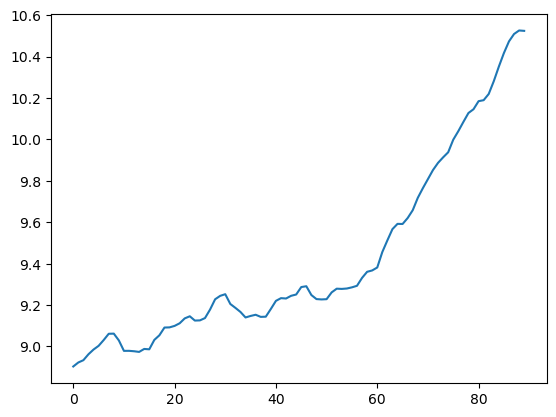

In [24]:
df_debilt_data['Temperatuur'].plot() # Maak een figuur van de kolom 'Temperatuur'

<Axes: xlabel='Jaar', ylabel='Temperatuur'>

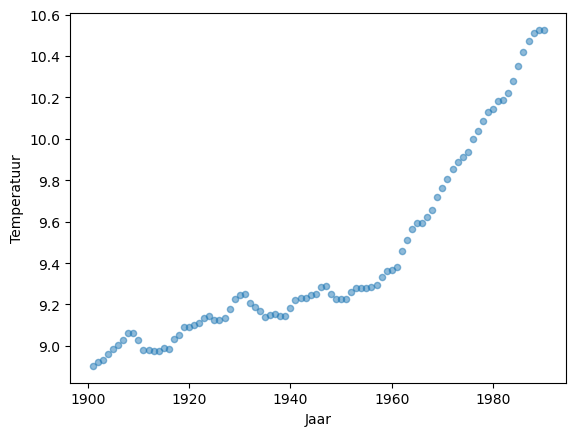

In [25]:
df_debilt_data.plot.scatter(x="Jaar", y="Temperatuur", alpha=0.5)  # Plot 'Jaar' op de x-as en 'Temperatuur' op de y-as. alpha=0.5 geeft deels doorzichtige symbolen.

## Samenvatting

Je kunt in Python heel goed werken met data in tabelvorm door gebruik te maken van de `Pandas module`. Hierin werk je met `Series` en `DataFrames` en kun je inzichtelijk werken doordat je kolommen aan kunt roepen met hun kolomnaam. Verder zijn er allerlei functies beschikbaar die je efficiënt data in tabelvorm laten visualiseren, aanpassen en samenvatten.

<!-- Links -->
[Python_Debugging]: 09_Python_Debugging.ipynb

# Ga naar het volgende deel: [09_Python_Debugging][Python_Debugging]